<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/LabTest/Q1_Insurance_DA_Lab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the given insurance dataset justify the hypothesis
1. Does bmi of males differ significantly from that of females?
2. Is the proportion of smokers significantly different in different genders?

In [1]:
import pandas as pd

In [69]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
df=df.dropna()

In [7]:
df.shape

(1338, 7)

1. For BMI Difference between Male and Female.

Assuming H0: There is no difference btw Mean BMI of Male and Female

Z_val = (Mean(bmiM) - Mean(bmiF)) / srqt( Var(bmiM)/n1 + Var(bmiF) /n2)

In [8]:
bmiM = df[df["sex"] == "male"]["bmi"]
bmiF = df[df["sex"] == "female"]["bmi"]

In [9]:
n1= len(bmiM)
n2 = len(bmiF)

In [10]:
Var_bmiM = bmiM.std() **2
Var_bmiF = bmiF.std() **2

In [11]:
Mean_bmiM = bmiM.mean()
Mean_bmiF = bmiF.mean()

In [14]:
import math

z_val = (Mean_bmiM-Mean_bmiF) / math.sqrt( (Var_bmiM/n1) + (Var_bmiF/n2))

In [15]:
z_val

1.6970279331238605

### Performing a Two Tail Test for Significance = 0.05

In [16]:
from scipy import stats

In [21]:
p_val=(1- stats.norm.cdf(z_val))*2

In [22]:
p_val

0.08969137964705132

#### Since 0.089 > 0.05 therefore we cannot Reject Null Hypothesis that there is no significant difference in BMI for Male and Female.

##### Statistically Mean BMI of Male and Female are same based on the sample data provided

##### Validating by plotting Histogram Plot

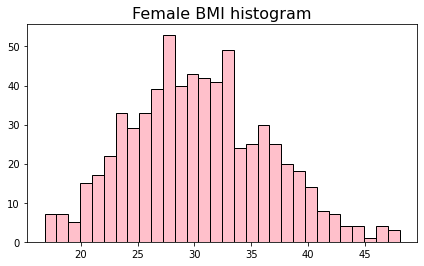

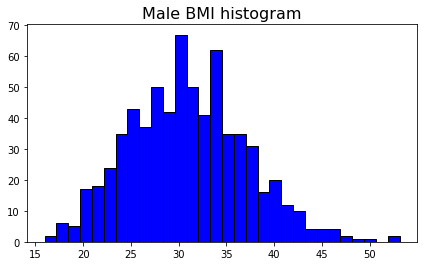

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(bmiF,edgecolor='k',color='pink',bins=30)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(bmiM,edgecolor='k',color='blue',bins=30)
plt.show()

## Is the proportion of smokers significantly different in different genders?

#### Solution 

* Filtering out smokers
* Check for all unique values for gender
* Performing Z-test/T-test Two Sample Independent Proportional Test  based on the count of number of samples

In [26]:
smokers = df[df["smoker"]=="yes"]

In [27]:
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [28]:
smokers.sex.unique()

array(['female', 'male'], dtype=object)

In [29]:
smokers.shape

(274, 7)

Since Number of Samples > 274 We can perform Two Sample Z-test for proportions

Assuming H0(Null): Prop_M = Prop_F


### Z_val = (Prop_M - Prop_F) / SQRT( (PropM* (1-PropM)/n1) + (PropF* (1-PropF)/n2) )

n1 = Number of Samples of Male 

n2 = Number of Samples of Female 

PropM = Proportion of Male Smokers out of Male Population

PropF = Proportion of Female Smokers out of Female Population

In [74]:
Male_Population = df[df["sex"] == "male"]
Female_Population = df[df["sex"] == "female"]

In [83]:
Prop_M = len(Male_Population[Male_Population["smoker"] == "yes"]) / len(Male_Population)
Prop_F = len(Female_Population[Female_Population["smoker"] == "yes"]) / len(Female_Population)

In [85]:
n1 = len(Male_Population)
n2 = len(Female_Population)

In [106]:
print("Biased Estimate")
z_val = (Prop_M - Prop_F) / math.sqrt( ( (Prop_M*(1-Prop_M))/n1 ) + ( (Prop_F*(1-Prop_F))/n2 ) )
print(z_val)

Biased Estimate
2.798151196389374


### Performing a Two Tail Test for Significance = 0.05

In [107]:
p_val=(1- stats.norm.cdf(z_val))*2

In [108]:
p_val

0.005139604761635219

### Since 0.0051 < 0.05 , Rejecting Null Hypothesis that proportion of Male and Female smokers are same.

So Proportion of male and female smokers are different